# Aprendizado Supervisionado no Neurônio Perceptron

In [110]:
# Importando as ferramentas

import numpy as np
import matplotlib.pyplot as plt
import random as rd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import math
from prettytable import PrettyTable

## Identificador da Equipe

O identificador trata-se de um código numérico de um dígito gerado pela soma do último dígito do número de matrícula de cada integrante do projeto em módulo 4. Este será usado em especificidades do presente projeto. Dessa forma, os números de matrículas são:

* 2315080005
* 2315080061
* 2315080010
* 2315080021
* 2315080022

Portanto, o identificador é dado por (5+1+0+1+2)mod(4) = 1.

In [113]:
ID = 1

##  Parte I– Resolvendo um Problema Linearmente Separável


1. Usar o arquivo dataAll.txt
2. Construir o algoritmo de treinamento do neurônio perceptron.

In [116]:
arq_input = "dataAll.txt"

dataAll = np.fromfile(arq_input, dtype=np.float64)
print("Tipo de dataAll: {}".format(type(dataAll)))
print("Número de elementos em dataAll: {}".format(dataAll.size))
print("\n")


# -1 infers the size of the new dimension from the size of the input array.
dataAll = np.reshape(dataAll, (1000, 1, 3))
print(dataAll[:10]) # Mostrando 10 exemplos

print("\n")
print("Shape de dataAll: {}".format(dataAll.shape))
print("Dimensões de dataAll: {}".format(dataAll.ndim))

Tipo de dataAll: <class 'numpy.ndarray'>
Número de elementos em dataAll: 3000


[[[-363.7884  244.1423    0.    ]]

 [[ 328.7572 -256.7658    1.    ]]

 [[-164.9827  613.2164    0.    ]]

 [[ 536.5905  764.9575    0.    ]]

 [[ 314.2297  343.8375    0.    ]]

 [[ -87.6395 -306.9783    1.    ]]

 [[-172.0622 -500.5087    1.    ]]

 [[ 727.9602  358.2956    1.    ]]

 [[ 752.3574  268.3682    1.    ]]

 [[ 685.6276 -833.4677    1.    ]]]


Shape de dataAll: (1000, 1, 3)
Dimensões de dataAll: 3


Como havia 3000 exemplos anteriormente e agora a matriz tem dimensões (1, 3). 
Então, há 3000/3 = 1000 exemplos em dataAll. Ou seja, (1000, 1, 3).

In [118]:
# Separando em x, y e rotulo 

print("x:")
x = dataAll[:, :, :2]
print(x.shape)
print(x[:10]) # Mostrando os 10 primeiros pontos 
print("\n")

print("y:")
y = dataAll[:,:, 2:]
print(y.shape)
print(y[:10]) # Rótulos dos pontos

x:
(1000, 1, 2)
[[[-363.7884  244.1423]]

 [[ 328.7572 -256.7658]]

 [[-164.9827  613.2164]]

 [[ 536.5905  764.9575]]

 [[ 314.2297  343.8375]]

 [[ -87.6395 -306.9783]]

 [[-172.0622 -500.5087]]

 [[ 727.9602  358.2956]]

 [[ 752.3574  268.3682]]

 [[ 685.6276 -833.4677]]]


y:
(1000, 1, 1)
[[[0.]]

 [[1.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]

 [[1.]]]


Criando o neurônio Perceptron:

In [120]:
class Perceptron:
    """
    A perceptron is a classification model that consists of a set of weights, or scores,
    one for every feature, and a threshold. The perceptron multiplies each weight by its
    corresponding score, and adds them, obtaining a score.
    by Rajwrite Nath on Medium
    """

    def __init__(self, threshold, lr, weight_low=-0.5, weight_high=0.5):
        self.threshold = threshold
        self.lr = lr
        self.weights = None
        self.weight_low = weight_low
        self.weight_high = weight_high
        self.scores = None
        self.adjustments = 0
        self.epochs = 0
        self.bias = -1

    def print_weights(self):
        np.set_printoptions()
        print("Weights:{}".format(self.weights))

    def gen_weights(self, low, high, size):
        self.weights = np.random.uniform(low, high, size=size).reshape(-1, 1)

    def step_fn(self, z):
        return np.where(z >= self.threshold, 1, 0)

    def error_fn(self, y_true, y_predicted):
        return y_true - y_predicted

    def predict(self, x_data):
        return self.step_fn(np.dot(x_data, self.weights))

    def fit(self, x_data, y_data):
        
        # Adicionando um bias ao x_data:
        bias = np.full((x_data.shape[0], 1, 1), self.bias)
        x_data = np.concatenate([bias, x_data], axis=2)
        # print(x_data)
        # print(x_data.shape)
        
        # Gerando pesos
        self.gen_weights(self.weight_low, self.weight_high, size=x_data.shape[2])
        # print("Início:")
        # self.print_weights()
        # print(self.weights.shape)
        
        
        y_predicted = self.predict(x_data)
        self.scores = y_predicted  # Atualiza os scores

        # Algoritmo executa até a convergência, supomos que as classes sejam linearmente separáveis
        while not np.all(y_data == self.scores):

            self.epochs += 1  # Não convergiu, vai necessitar de mais 1 época

            # Para os pesos que resultaram em uma predição errada:

            predicoes_incorretas = np.where(y_data != self.scores)[0]

            for i in predicoes_incorretas:
                x_i = x_data[i]
                y_i = y_data[i]
                y_pred = y_predicted[i]

                # Calculando erros
                error = self.error_fn(y_i, y_pred)

                # Relculando pesos
                self.weights += self.lr * error * x_i.T
                self.adjustments += 1

            y_predicted = self.predict(x_data)
            self.scores = y_predicted # Atualiza os scores novamente com base nos ajustes

# Inicializando o neurônio
neuronio_perceptron = Perceptron(threshold=0, lr=0.1)
neuronio_perceptron.fit(x, y)
print("Final: ")
neuronio_perceptron.print_weights()

Final: 
Weights:[[-4.24417163e+00]
 [ 3.18715574e+04]
 [-3.18669406e+04]]


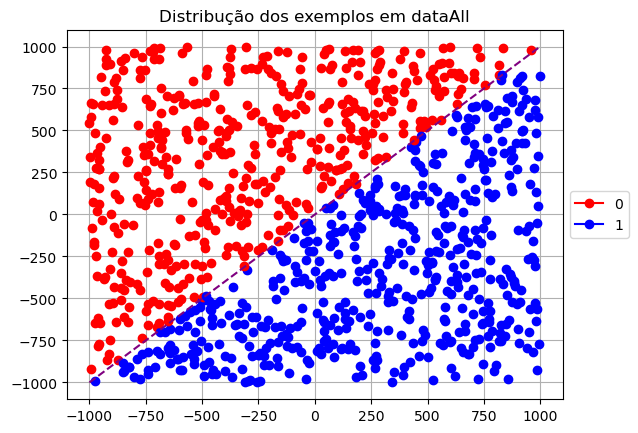

In [121]:
# Gerando o gráfico

def gen_grafico(data, final_w, title):
    x_1 = data[:,:, :1]
    x_2 = data[:,:, 1:2]
    y = data[:, :, 2:]
    fig, ax = plt.subplots()
    cor = {0: 'red', 1:'blue'}
    for i in range(data.shape[0]):
        plt.plot(x_1[i][0][0], x_2[i][0][0], marker='o', c = cor[y[i][0][0]])
        
    
    x = np.arange(-1000, 1001, 1)
    reta = (final_w[0][0]/final_w[2][0]) - (final_w[1][0]/final_w[2][0]) * x
    plt.plot(x, reta, color='purple', linestyle='--', markersize=0.5)
    ax.legend(cor, loc='center left', bbox_to_anchor=(1, 0.5))
    ax.grid(True)
    ax.set_title(title)
    plt.show()

gen_grafico(dataAll, neuronio_perceptron.weights, "Distribução dos exemplos em dataAll")

# Parte II - Experimentação

In [123]:
from prettytable import PrettyTable

In [124]:
arq1 = "data1.txt"

data1 = np.fromfile(arq1, dtype=np.float64)

print("Tipo de data1: {}".format(type(data1)))
print("Número de elementos em data1: {}".format(data1.size))
print("\n")

data1 = np.reshape(data1, (600, 1, 3))
print(data1[:10])

print("\n")
print("Shape de data1: {}".format(data1.shape))
print("Dimensões de data1: {}".format(data1.ndim))

Tipo de data1: <class 'numpy.ndarray'>
Número de elementos em data1: 1800


[[[ 0.13658687 -0.16460088  0.        ]]

 [[-0.0228559  -0.01094684  0.        ]]

 [[-0.02654897  0.00582183  0.        ]]

 [[ 0.07457416  0.0650317   0.        ]]

 [[-0.01276975 -0.07384375  0.        ]]

 [[-0.12726004 -0.07634222  0.        ]]

 [[ 0.10788236 -0.12570374  0.        ]]

 [[ 0.0073026   0.02487588  0.        ]]

 [[ 0.15786546  0.07393671  0.        ]]

 [[ 0.12837721  0.05681431  0.        ]]]


Shape de data1: (600, 1, 3)
Dimensões de data1: 3


In [125]:
# Separando em x, y e rotulo 

print("x:")
x = data1[:, :, :2]
print(x.shape)
print(x[:10]) # Mostrando os 10 primeiros pontos 
print("\n")

print("y:")
y = data1[:,:, 2:]
print(y.shape)
print(y[:10]) # Rótulos dos pontos

x:
(600, 1, 2)
[[[ 0.13658687 -0.16460088]]

 [[-0.0228559  -0.01094684]]

 [[-0.02654897  0.00582183]]

 [[ 0.07457416  0.0650317 ]]

 [[-0.01276975 -0.07384375]]

 [[-0.12726004 -0.07634222]]

 [[ 0.10788236 -0.12570374]]

 [[ 0.0073026   0.02487588]]

 [[ 0.15786546  0.07393671]]

 [[ 0.12837721  0.05681431]]]


y:
(600, 1, 1)
[[[0.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[0.]]]


In [126]:
config = [(0.4, (-100, 100)),
         (0.1, (-100, 100)),
         (0.01, (-100, 100)),
         (0.4, (-0.5, 0.5)),
         (0.1, (-0.5, 0.5)),
         (0.01, (-0.5, 0.5))] # as seis configurações do 

def run_experiment(x, y, config, n_runs=10):
    results = []
    
    for lr, (weight_low, weight_high) in config:
        adjustments = []
        epochs = []
        
        for _ in range (n_runs):
            p = Perceptron(threshold=0, lr=lr, weight_low=weight_low, weight_high=weight_high)
            p.fit(x, y)
            adjustments.append(p.adjustments)
            epochs.append(p.epochs)
            
        media_ajustes = np.mean(adjustments)
        desvio_ajustes = np.std(adjustments)
        menor_epoca = np.min(epochs)

        results.append((lr, (weight_low, weight_high), media_ajustes, desvio_ajustes, menor_epoca))
    
    return results
        

In [127]:
def print_results_table(results):
    table = PrettyTable()
    table.field_names = ["Taxa de Aprendizado", "Intervalo de Pesos", "Quantidade de ajustes", "Menor número de épocas para convergência"]

    for lr, (w_low, w_high), media, desvio, min_epocas in results:
        ajustes_fmt = f"{media:.2f} ± {desvio:.2f}"
        intervalo_fmt = f"({w_low}, {w_high})"
        table.add_row([lr, intervalo_fmt, ajustes_fmt, min_epocas])

    print(table)


In [128]:
results = run_experiment(x, y, config, n_runs=10)
print_results_table(results)

+---------------------+--------------------+-----------------------+------------------------------------------+
| Taxa de Aprendizado | Intervalo de Pesos | Quantidade de ajustes | Menor número de épocas para convergência |
+---------------------+--------------------+-----------------------+------------------------------------------+
|         0.4         |    (-100, 100)     |    1437.80 ± 374.61   |                    5                     |
|         0.1         |    (-100, 100)     |    2505.50 ± 512.88   |                    12                    |
|         0.01        |    (-100, 100)     |   18522.70 ± 7901.84  |                    55                    |
|         0.4         |    (-0.5, 0.5)     |    1355.90 ± 270.00   |                    5                     |
|         0.1         |    (-0.5, 0.5)     |    1505.70 ± 415.37   |                    6                     |
|         0.01        |    (-0.5, 0.5)     |    1170.00 ± 281.41   |                    5               

Taxas de aprendizado altas (0.1-0.4) aceleram a convergência (3-15 épocas) mas causam instabilidade, especialmente com pesos iniciais amplos (-100 a 100). Taxas baixas (0.01) são estáveis porém lentas (5-40 épocas), exceto quando combinadas com pesos em escala reduzida (-0.5 a 0.5), que otimizam o treinamento (1.400 ajustes em 5 épocas). A melhor configuração equilibrada é taxa 0.1 com pesos entre -0.5 e 0.5, garantindo convergência rápida (6 épocas) e estável. A escolha da inicialização e taxa de aprendizado é decisiva para um treinamento eficiente.

# Parte III – Validação Holdout em Problema Não-Linearmente Separável

In [131]:
arq_holdout = "dataHoldout.txt"

dataHoldout = np.fromfile(arq_holdout, dtype=np.float64)

print("Tipo de dataHoldout: {}".format(type(dataHoldout)))
print("Número de elementos em dataHoldout: {}".format(dataHoldout.size))
print("\n")

dataHoldout = np.reshape(dataHoldout, (800, 1, 3))
print(dataHoldout[:10])

print("\n")
print("Shape de dataHoldout: {}".format(dataHoldout.shape))
print("Dimensões de dataHoldout: {}".format(dataHoldout.ndim))

Tipo de dataHoldout: <class 'numpy.ndarray'>
Número de elementos em dataHoldout: 2400


[[[-0.29322959 -0.09065359  1.        ]]

 [[ 0.07988839  0.21101297  1.        ]]

 [[-0.07825563 -0.08083512  1.        ]]

 [[-0.46833414 -0.10620722  1.        ]]

 [[ 0.46304142  0.09405471  1.        ]]

 [[ 0.0114998  -0.05939114  1.        ]]

 [[ 0.27238274  0.18359397  1.        ]]

 [[ 0.08690974  0.00654493  1.        ]]

 [[ 0.0824192   0.00106606  1.        ]]

 [[-0.00940128 -0.10654841  1.        ]]]


Shape de dataHoldout: (800, 1, 3)
Dimensões de dataHoldout: 3


In [179]:
def holdout_grafico(data,title):
    x_1 = data[:,:, :1]
    x_2 = data[:,:, 1:2]
    y = data[:, :, 2:]
    fig, ax = plt.subplots()
    cor = { 0: 'red', 1:'blue'}
    for i in range(data.shape[0]):
        plt.plot(x_1[i][0][0], x_2[i][0][0], marker='o', c = cor[y[i][0][0]])
    
    legenda = [
        Line2D([0], [0], marker='o', color='w', label='0',
               markerfacecolor='red', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='1',
               markerfacecolor='blue', markersize=10)
    ]

    ax.legend(handles=legenda, loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_title(title)
    plt.show()
        
holdout_grafico(dataHoldout,"Gráfico Inicial de Espalhamento")

<Figure size 640x480 with 1 Axes>

In [134]:
#Declarando a semente de aleatoriedade
np.random.seed(ID)

#Utilização do permutation para embaralhar a array dataHoldout
dataHoldout = np.random.permutation(dataHoldout)

#Definição do tamanho do array de treino como 70% do original
training_amount=int(800*0.7)

#Divisão de teste e treino
training_sample=dataHoldout[:(training_amount)]
test_sample=dataHoldout[(training_amount):]

#Análise se as amostras se mantém constantes 
print(training_sample[:10])
print("\n")
print(test_sample[:10])


[[[ 8.24192013e-02  1.06606167e-03  1.00000000e+00]]

 [[ 5.94652955e-01  2.01805927e-01  0.00000000e+00]]

 [[-2.91236210e-01  1.10116221e-01  1.00000000e+00]]

 [[ 1.18912064e+00  1.13038550e+00  0.00000000e+00]]

 [[-3.67262868e-02  1.18813458e+00  0.00000000e+00]]

 [[ 8.18788528e-01  1.11023707e+00  0.00000000e+00]]

 [[ 9.68198256e-01  9.38606971e-02  0.00000000e+00]]

 [[ 1.41870990e+00 -1.42533840e-01  0.00000000e+00]]

 [[-2.85528762e-01 -1.69102194e-01  1.00000000e+00]]

 [[ 6.13080793e-01  8.29270857e-01  0.00000000e+00]]]


[[[ 0.0971824   1.07365817  0.        ]]

 [[-0.16614939  1.08731541  0.        ]]

 [[ 1.09934728  0.10419019  0.        ]]

 [[ 1.20489821  0.05660458  0.        ]]

 [[-0.31310084  0.27736732  1.        ]]

 [[ 0.19643799  0.20349331  1.        ]]

 [[ 0.21675147  0.54097717  1.        ]]

 [[-0.28620777  1.059365    0.        ]]

 [[ 1.26051082 -0.2161084   0.        ]]

 [[ 0.01004054 -0.29692638  1.        ]]]


In [135]:
# Separando em x, y e rotulo de teste e treino

print("x_Treino:")
x_training= training_sample[:, :, :2]
print(x_training.shape)
print(x_training[:5]) # Mostrando os 5 primeiros pontos 
print("\n")

print("y_training:")
y_training = training_sample[:,:, 2:]
print(y_training.shape)
print(y_training[:5]) # Rótulos dos pontos


print("x_Teste:")
x_test= test_sample[:, :, :2]
print(x_test.shape)
print(x_test[:5]) # Mostrando os 5 primeiros pontos 
print("\n")

print("y_test:")
y_test = test_sample[:,:, 2:]
print(y_test.shape)
print(y_test[:5]) # Rótulos dos pontos

x_Treino:
(560, 1, 2)
[[[ 8.24192013e-02  1.06606167e-03]]

 [[ 5.94652955e-01  2.01805927e-01]]

 [[-2.91236210e-01  1.10116221e-01]]

 [[ 1.18912064e+00  1.13038550e+00]]

 [[-3.67262868e-02  1.18813458e+00]]]


y_training:
(560, 1, 1)
[[[1.]]

 [[0.]]

 [[1.]]

 [[0.]]

 [[0.]]]
x_Teste:
(240, 1, 2)
[[[ 0.0971824   1.07365817]]

 [[-0.16614939  1.08731541]]

 [[ 1.09934728  0.10419019]]

 [[ 1.20489821  0.05660458]]

 [[-0.31310084  0.27736732]]]


y_test:
(240, 1, 1)
[[[0.]]

 [[0.]]

 [[0.]]

 [[0.]]

 [[1.]]]


In [136]:
class Controled_Perceptron:
    """
    This class works equals to the Perceptron class, but it doesn't stop when the neuron is all trained but when a
    limit of epochs has been passed
 
    """

    def __init__(self, threshold, lr ,limit):
        self.threshold = threshold
        self.lr = lr
        self.weights = None
        self.scores = None
        self.adjustments = 0
        self.epochs = 0
        self.bias = -1
        self.limit=limit

    def print_weights(self):
        np.set_printoptions()
        print("Weights:{}".format(self.weights))

    def gen_weights(self, low, high, size):
        self.weights = np.random.uniform(low, high, size=size).reshape(-1, 1)

    def step_fn(self, z):
        return np.where(z >= self.threshold, 1, 0)

    def error_fn(self, y_true, y_predicted):
        return y_true - y_predicted

    def predict(self, x_data):
        return self.step_fn(np.dot(x_data, self.weights))

    def fit(self, x_data, y_data):
        
        # Adicionando um bias ao x_data:
        bias = np.full((x_data.shape[0], 1, 1), self.bias)
        x_data = np.concatenate([bias, x_data], axis=2)
        print(x_data)
        print(x_data.shape)
        
        # Gerando pesos
        self.gen_weights(-0.5, 0.5, size=x_data.shape[2])
        print("Início:")
        self.print_weights()
        print(self.weights.shape)
        
        
        y_predicted = self.predict(x_data)
        self.scores = y_predicted  # Atualiza os scores

        # Algoritmo executa até a convergência, supomos que as classes sejam linearmente separáveis
        while(self.epochs<=self.limit):

            self.epochs += 1  # Não convergiu, vai necessitar de mais 1 época

            # Para os pesos que resultaram em uma predição errada:

            predicoes_incorretas = np.where(y_data != self.scores)[0]

            for i in predicoes_incorretas:
                x_i = x_data[i]
                y_i = y_data[i]
                y_pred = y_predicted[i]

                # Calculando erros
                error = self.error_fn(y_i, y_pred)

                # Relculando pesos
                self.weights += self.lr * error * x_i.T
                self.adjustments += 1

            y_predicted = self.predict(x_data)
            self.scores = y_predicted # Atualiza os scores novamente com base nos ajustes
            
neuronio_perceptron_holdout = Controled_Perceptron(threshold=0, lr=0.1, limit=100)
neuronio_perceptron_holdout.fit(x_training, y_training)
print("Final: ")
neuronio_perceptron_holdout.print_weights()

[[[-1.00000000e+00  8.24192013e-02  1.06606167e-03]]

 [[-1.00000000e+00  5.94652955e-01  2.01805927e-01]]

 [[-1.00000000e+00 -2.91236210e-01  1.10116221e-01]]

 ...

 [[-1.00000000e+00  1.48148278e-01  1.19025708e+00]]

 [[-1.00000000e+00  3.56021444e-01  8.09699529e-01]]

 [[-1.00000000e+00  1.12404537e-02  1.22703329e+00]]]
(560, 1, 3)
Início:
Weights:[[ 0.06052999]
 [ 0.17172978]
 [-0.14757037]]
(3, 1)
Final: 
Weights:[[-2.93947001]
 [-6.14939855]
 [-6.48613103]]


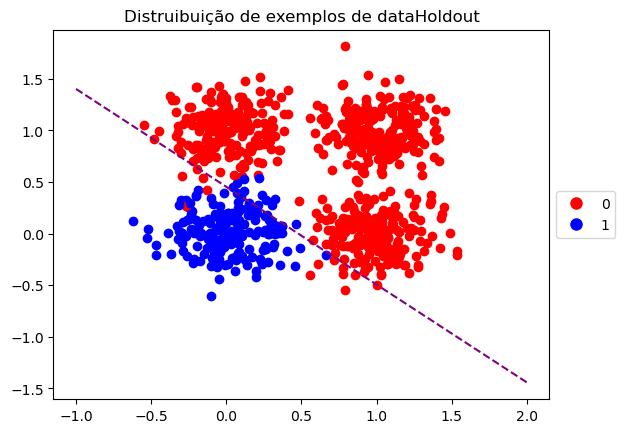

In [199]:
def holdout_line_grafico(data,final_w,title):
    x_1 = data[:,:, :1]
    x_2 = data[:,:, 1:2]
    y = data[:, :, 2:]
    fig, ax = plt.subplots()
    cor = { 0: 'red', 1:'blue'}
    for i in range(data.shape[0]):
        plt.plot(x_1[i][0][0], x_2[i][0][0], marker='o', c = cor[y[i][0][0]])

    x = np.arange(-1, 3, 1)
    reta = (final_w[0][0]/final_w[2][0]) - (final_w[1][0]/final_w[2][0]) * x
    plt.plot(x, reta, color='purple', linestyle='--', markersize=0.5)

    legenda = [
        Line2D([0], [0], marker='o', color='w', label='0',
               markerfacecolor='red', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='1',
               markerfacecolor='blue', markersize=10)
    ]

    ax.legend(handles=legenda, loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_title(title)
    ax.plot()

holdout_line_grafico(dataHoldout,neuronio_perceptron_holdout.weights,"Distruibuição de exemplos de dataHoldout")

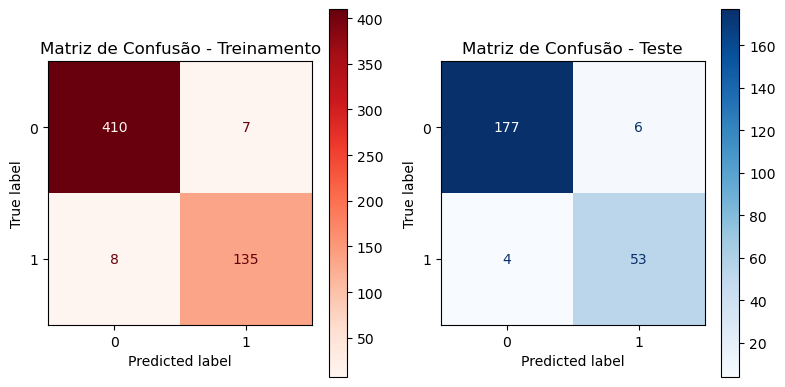

In [138]:
def pred(data, neuron):
    bias = np.full((data.shape[0], 1, 1), neuron.bias)
    data = np.concatenate([bias, data], axis=2)
    return neuron.predict(data).reshape(-1)

y_training_pred = pred(x_training, neuronio_perceptron_holdout)
y_training = y_training.reshape(-1)

y_test_pred = pred(x_test, neuronio_perceptron_holdout)
y_test = y_test.reshape(-1)

cm_training = confusion_matrix(y_training, y_training_pred, labels=[0, 1])
cm_test = confusion_matrix(y_test, y_test_pred, labels=[0, 1])

# Plotando
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Matriz de Treinamento
ConfusionMatrixDisplay(confusion_matrix=cm_training, display_labels=[0,1]).plot(ax=ax[0], cmap="Reds")
ax[0].set_title("Matriz de Confusão - Treinamento")

# Matriz de Teste
ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0,1]).plot(ax=ax[1], cmap="Blues")
ax[1].set_title("Matriz de Confusão - Teste")

plt.tight_layout()
plt.show()


Diante da matriz de confusão obtida, percebe-se um comportamento parecido tanto para os dados de treinamento quanto para os de teste. Errando apenas em alguns casos, tendo valores de falsos positivos e falsos negativos aproximados para essas quantidades de dados. No entanto, uma análise mais detalhada é possível apenas mediante o cálculo das métricas, o que será realizado em seguinda.

Métricas a serem calculadas:
1. Acurácia
2. Precisão
3. Revocação
4. F-Score.

In [140]:
training_metrics = {
    "accuracy" : accuracy_score(y_training, y_training_pred),
    "precision" : precision_score(y_training, y_training_pred, average="binary"),
    "recall" : recall_score(y_training, y_training_pred, average="binary"),
    "f_1Score" : f1_score(y_training, y_training_pred, average="binary")
    }

test_metrics = {
    "accuracy" : accuracy_score(y_test, y_test_pred),
    "precision" : precision_score(y_test, y_test_pred, average="binary"),
    "recall" : recall_score(y_test, y_test_pred, average="binary"),
    "f_1Score" : f1_score(y_test, y_test_pred, average="binary")
    }

table = PrettyTable()
table.padding_width = 8

table.title = "Métricas de treinamento e de teste"
table.field_names = ["", "Treinamento", "Teste"]
table.add_row(["Acurácia", f"{training_metrics["accuracy"]:.4f}", f"{test_metrics["accuracy"]:.4f}"])
table.add_row(["Precisão", f"{training_metrics["precision"]:.4f}", f"{test_metrics["precision"]:.4f}"])
table.add_row(["Revocação", f"{training_metrics["recall"]:.4f}", f"{test_metrics["recall"]:.4f}"])
table.add_row(["F1_Score", f"{training_metrics["f_1Score"]:.4f}", f"{test_metrics["f_1Score"]:.4f}"])
print(table)

+----------------------------------------------------------------------------+
|                     Métricas de treinamento e de teste                     |
+-------------------------+---------------------------+----------------------+
|                         |        Treinamento        |        Teste         |
+-------------------------+---------------------------+----------------------+
|         Acurácia        |           0.9732          |        0.9583        |
|         Precisão        |           0.9507          |        0.8983        |
|        Revocação        |           0.9441          |        0.9298        |
|         F1_Score        |           0.9474          |        0.9138        |
+-------------------------+---------------------------+----------------------+


In [141]:
print(0.9138-0.9474/0.9474)

-0.08620000000000005


As métricas utilizaram a média (average) binária, dado que a tarefa é de classificação binária desbalanceada. Diante disso, as métricas obtidas foram elevadas, i.e. acima de 90% em geral. A perda percentual da métrica F1_Score foi relativamente pequena, com um decréscimo de 8,62%. Tais métricas indicam uma boa convergência do modelo, apesar de este procurar uma solução linear para um problema não linear. Contudo, em se tratando da aplicabilidade do modelo, não é possível definí-lo como eficiente apenas com os dados obtidos. Isso se deve ao fato do número de dados utilizados ser reduzido, de modo que seja possível não estar refletindo precisamente os outliers, tornando a predição pouco eficaz para possíveis outros datasets. 

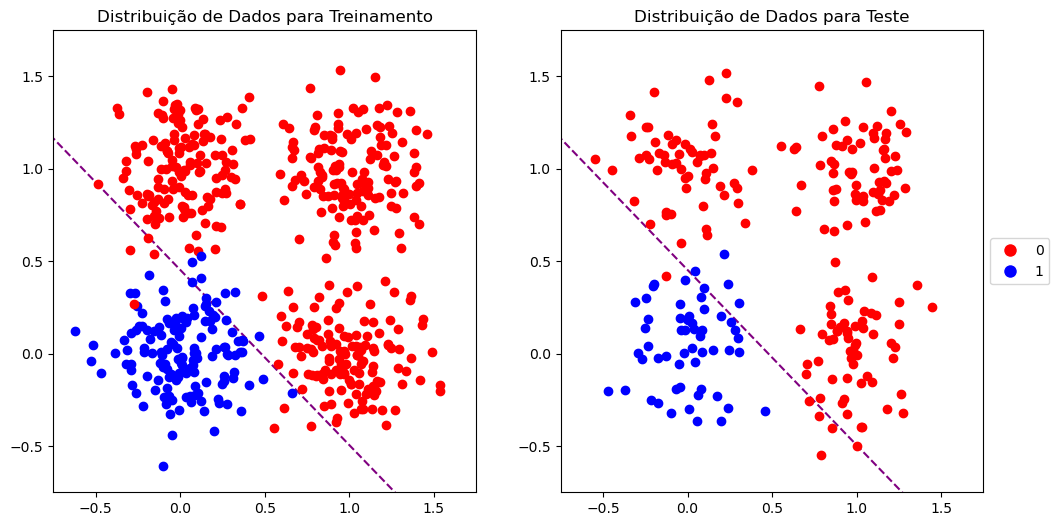

In [257]:
x = np.arange(-1, 3, 1)

w0, w1, w2 = neuronio_perceptron_holdout.weights
w0, w1, w2 = w0[0], w1[0], w2[0]

reta = (w0/w2) - (w1/w2) * x

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(x, reta, color='purple', linestyle='--', markersize=0.5)
ax[1].plot(x, reta, color='purple', linestyle='--', markersize=0.5)

cor = {0 : "red", 1 : "blue"}

for i in range(x_training.shape[0]):
    ax[0].plot(x_training[i][0][0], x_training[i][0][1], marker='o', c = cor[y_training[i]])
ax[0].set_title("Distribuição de Dados para Treinamento")

for i in range(x_test.shape[0]):
    ax[1].plot(x_test[i][0][0], x_test[i][0][1], marker='o', c = cor[y_test[i]])
ax[1].set_title("Distribuição de Dados para Teste")
    
legenda = [
    Line2D([0], [0], marker='o', color='w', label='0',
           markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='1',
           markerfacecolor='blue', markersize=10)
]

ax[1].legend(handles=legenda, loc='center left', bbox_to_anchor=(1, 0.5))
ax[0].set_ylim(-0.75, 1.75)
ax[1].set_ylim(-0.75, 1.75)
ax[0].set_xlim(-0.75, 1.75)
ax[1].set_xlim(-0.75, 1.75)

plt.show()

Com estes gráficos, é possível a visualização dos pontos dados como falsos positivos e falsos negativos na matriz de confusão, também é expressa a manutenção da proporção entre classes no processo de permutação do dataset durante o holdout.